![image.png](agent-minimal-poster.svg)

![image.png](ev-sales-training-detailed.svg)

![image.png](ev-sales-task-breakdown.svg)

![image.png](agent-course-outline.svg)

![image.png](agent-quote-page.svg)

# 一、Agent介绍

![image.png](chinese-agent-architecture.svg)

# 基于大型语言模型（LLM）的 AI Agent 简介

AI Agent 是一种 **利用大型语言模型（LLM）作为“大脑”** 的自主或半自主系统。相比传统的对话式 AI，AI Agent 能够做的不只是对话，还包括：

- 调用外部工具
- 访问网络
- 运行代码
- 自动执行复杂任务

这些能力让 AI Agent 在多个实际场景中展现出巨大潜力。

---

## 🌟 AI Agent 能做什么？

| 功能类型       | 具体能力说明                                         |
|--------------|----------------------------------------------------|
| ✅ 多轮对话     | 上下文追踪、任务型对话、高度智能的人机交互                         |
| 🔍 联网搜索     | 自动调用搜索引擎、检索外部文档、获取实时信息                        |
| 📊 数据分析     | 自动读取、分析和解释数据，支持可视化输出等                         |
| 🔁 多步任务执行 | 自动规划并执行一系列步骤，如网页操作、任务分派、代码运行等               |


---

## ❗️其核心就是：

<div style="color: red; font-weight: bold; font-size: 1.2em">

1. 给大脑赋予了双手  
→ **通过组件化工具（如联网搜索、IDE、计算器、RPA 等）让大模型具备“行动力”**

2. 组成一个完整的工作流  
→ **从简单问答跃升为能完成一个完整任务链的“智能工作者”**

</div>


---

## 🧠 核心架构模块

为了支持多样化和复杂的功能，AI Agent 一般包含以下几个**关键模块**：

### 1. 计划模块（Planning）
- 负责理解目标任务
- 拆解任务为可执行的步骤
- 生成行动计划

### 2. 记忆模块（Memory）
- 存储与任务相关的历史记录、上下文信息
- 支持长期记忆与短期记忆
- 提高连续对话与任务一致性

### 3. 工具使用模块（Tools）
- 能调用各种外部工具，如：
  - 网络搜索引擎
  - API 接口
  - 计算器、代码执行器
- 实现感知-行动闭环

### 4. 执行模块（Executor）
- 根据计划执行每一步操作
- 反馈执行结果并调整策略（如果需要）

---

## 🧩 技术特点 vs 传统对话式 AI

| 对比维度           | 传统对话式 AI                     | 基于 LLM 的 AI Agent                   |
|------------------|----------------------------------|--------------------------------------|
| 交互方式           | 单轮或有限多轮对话                   | 支持多轮交互，任务持续性强                  |
| 能力边界           | 仅限于预设回复、有限理解               | 可动态调用工具，灵活执行复杂任务              |
| 知识更新           | 静态（训练时固定）                  | 可实时联网，获取最新信息                   |
| 执行复杂任务能力       | 很弱                            | 强，支持规划、执行、反馈、修正的闭环流程         |

---

## 📌 应用场景举例

- 数据分析助手：自动读取数据文件并生成洞察报告
- 网络搜索助手：针对用户问题自动搜索、筛选、整合信息
- 自动化办公：如安排会议、发送邮件、处理文档等
- 智能客服：处理多轮对话、跟踪用户请求、提供个性化回应


---

> 🚀 未来，AI Agent 有望成为个人助理、企业助手、智能自动化等领域的关键技术力量。
## ❗️结合一切的行业know-how：

<div style="color: red; font-weight: bold; font-size: 1.2em">

对我们而言，核心是深入一个场景，把最牛的做这件事情的人的流程拆解下来，knowhow融入到工作流中

</div>
---


![image.png](ai-agent-flowchart.svg)

# 二、Milvus+BGE构造一个RAG组件

![image.png](rag-system-workflow.svg)

## 1.文档解析

In [3]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
import nest_asyncio

nest_asyncio.apply()

from llama_cloud_services import LlamaParse

parser = LlamaParse(
    api_key="llx-iToN6EalVjBF4AQu2NQll5yhRLiY1NPn7PzxqV0a1m4mZcfY",  # can also be set in your env as LLAMA_CLOUD_API_KEY
    result_type="markdown",  # "markdown" and "text" are available
    num_workers=3,  # if multiple files passed, split in `num_workers` API calls
    verbose=True,
    language="ch_sim",  # Optionally you can define a language, default=en
)

file_extractor = {".pdf": parser}
documents_cloud = SimpleDirectoryReader(
    "./data", file_extractor=file_extractor
).load_data()

Started parsing the file under job_id bd1cbc72-9f50-45f0-baf2-0de1925340ab


In [4]:
from pprint import pprint
for doc in documents_cloud:
    pprint(doc.text)

('# 星⾠电动ES9·未来旗舰电动SUV产品介绍\n'
 '\n'
 '# ⽬录\n'
 '\n'
 '1. 产品概述\n'
 '2. 设计理念\n'
 '3. 技术规格\n'
 '4. 驱动系统\n'
 '5. 电池与充电\n'
 '6. 智能座舱\n'
 '7. 智能驾驶\n'
 '8. 安全系统\n'
 '9. ⻋⾝结构\n'
 '10. 舒适性与便利性\n'
 '11. 版本与配置\n'
 '12. 价格与购买信息\n'
 '13. 售后服务\n'
 '14. 环保贡献\n'
 '15. ⽤⼾评价\n'
 '16. 竞品对⽐\n'
 '17. 常⻅问题\n'
 '18. 联系⽅式\n'
 '\n'
 '# 产品概述\n'
 '\n'
 '星⾠电动ES9是星⾠汽⻋公司推出的旗舰级纯电动智能SUV，代表了当前电动汽⻋领域的最⾼技术⽔平。ES9采⽤全新第四代电动平台架构，集成了前沿电池技术、智能驾驶辅助系统和创新交互体验，为⽤⼾提供安全、⾼效、舒适的出⾏解决⽅案。\n'
 '\n'
 'ES9以"科技融⼊⽣活，电动改变未来"为产品理念，通过⽆缝连接⻋辆、⽤⼾和环境，创造全⽅位的智能移动体验。⽆论是⽇常通勤、⻓途旅⾏还是家庭出游，ES9都能满⾜现代⽤⼾多样化的⽤⻋需求。\n'
 '\n'
 '作为星⾠汽⻋的旗舰产品，ES9凝聚了公司⼗年电动汽⻋研发经验，是智能电动出⾏的典范之作。')
('# 设计理念\n'
 '\n'
 '# 外观设计：未来主义与空⽓动⼒学的完美融合\n'
 '\n'
 'ES9的外观设计由国际知名设计师团队主导，采⽤"流体动⼒学"设计语⾔，将未来感与实⽤性完美结合。⻋⾝线条流畅优雅，同时实现了0.21的超低⻛阻系数，处于全球SUV领先⽔平。\n'
 '\n'
 '设计团队精⼼打造的细节包括：\n'
 '\n'
 '- 封闭式前格栅设计，减少⻛阻同时彰显电动⻋特性\n'
 '- 隐藏式⻔把⼿，在保证便利性的同时提升整⻋流线型外观\n'
 '- 全LED矩阵⼤灯组，配合贯穿式光带，创造独特夜间辨识度\n'
 '- 22英⼨空⽓动⼒学轮毂，减少涡流产⽣，提⾼能源效率\n'
 '- 全景玻璃⻋顶，提供开阔视野的同时保持优雅⻋⾝⽐例\n'
 '\n'
 '# 内饰设计：以⼈为本的未来座舱\n'
 '\n'
 'ES9内饰秉承"以⼈为本"的设计理念，打造宁

## 2.切块

In [5]:
def chunk_text(text, max_chunk_size=300):
    """
    将文本切分成固定大小的块，保持段落和表格的完整性。
    
    Args:
        text (str): 需要切分的文本
        max_chunk_size (int): 每个块的最大大小，默认为300
        
    Returns:
        list: 包含切分后文本块的列表
    """
    # 按行分割文本
    lines = text.split('\n')
    
    chunks = []
    current_chunk = []
    current_size = 0
    in_table = False
    table_content = []
    
    for line in lines:
        # 检测表格开始 (含有 | 字符的行，通常是表格)
        if '|' in line and not in_table:
            # 可能是表格的开始
            in_table = True
            
            # 保存当前块
            if current_chunk:
                chunks.append('\n'.join(current_chunk))
                current_chunk = []
                current_size = 0
            
            table_content.append(line)
        
        # 表格内容
        elif in_table:
            table_content.append(line)
            
            # 如果遇到空行，可能表示表格结束
            if not line.strip():
                in_table = False
                chunks.append('\n'.join(table_content))
                table_content = []
            
        # 普通内容
        else:
            line_length = len(line)
            
            # 如果加上这一行会超过最大块大小，并且当前块不为空，则保存当前块
            if current_size + line_length > max_chunk_size and current_chunk:
                chunks.append('\n'.join(current_chunk))
                current_chunk = []
                current_size = 0
            
            # 添加新行到当前块
            current_chunk.append(line)
            current_size += line_length
            
            # 如果当前行为空，可能是段落结束
            # 检查当前块大小，如果已经足够大，则保存当前块
            if not line.strip() and current_size > max_chunk_size // 2:
                chunks.append('\n'.join(current_chunk))
                current_chunk = []
                current_size = 0
    
    # 处理剩余的表格内容
    if in_table and table_content:
        chunks.append('\n'.join(table_content))
    
    # 处理最后剩余的块
    if current_chunk:
        chunks.append('\n'.join(current_chunk))
    
    return chunks


In [6]:
all_doc=''
for doc in documents_cloud:
    all_doc+=doc.text

In [7]:
all_doc

'# 星⾠电动ES9·未来旗舰电动SUV产品介绍\n\n# ⽬录\n\n1. 产品概述\n2. 设计理念\n3. 技术规格\n4. 驱动系统\n5. 电池与充电\n6. 智能座舱\n7. 智能驾驶\n8. 安全系统\n9. ⻋⾝结构\n10. 舒适性与便利性\n11. 版本与配置\n12. 价格与购买信息\n13. 售后服务\n14. 环保贡献\n15. ⽤⼾评价\n16. 竞品对⽐\n17. 常⻅问题\n18. 联系⽅式\n\n# 产品概述\n\n星⾠电动ES9是星⾠汽⻋公司推出的旗舰级纯电动智能SUV，代表了当前电动汽⻋领域的最⾼技术⽔平。ES9采⽤全新第四代电动平台架构，集成了前沿电池技术、智能驾驶辅助系统和创新交互体验，为⽤⼾提供安全、⾼效、舒适的出⾏解决⽅案。\n\nES9以"科技融⼊⽣活，电动改变未来"为产品理念，通过⽆缝连接⻋辆、⽤⼾和环境，创造全⽅位的智能移动体验。⽆论是⽇常通勤、⻓途旅⾏还是家庭出游，ES9都能满⾜现代⽤⼾多样化的⽤⻋需求。\n\n作为星⾠汽⻋的旗舰产品，ES9凝聚了公司⼗年电动汽⻋研发经验，是智能电动出⾏的典范之作。# 设计理念\n\n# 外观设计：未来主义与空⽓动⼒学的完美融合\n\nES9的外观设计由国际知名设计师团队主导，采⽤"流体动⼒学"设计语⾔，将未来感与实⽤性完美结合。⻋⾝线条流畅优雅，同时实现了0.21的超低⻛阻系数，处于全球SUV领先⽔平。\n\n设计团队精⼼打造的细节包括：\n\n- 封闭式前格栅设计，减少⻛阻同时彰显电动⻋特性\n- 隐藏式⻔把⼿，在保证便利性的同时提升整⻋流线型外观\n- 全LED矩阵⼤灯组，配合贯穿式光带，创造独特夜间辨识度\n- 22英⼨空⽓动⼒学轮毂，减少涡流产⽣，提⾼能源效率\n- 全景玻璃⻋顶，提供开阔视野的同时保持优雅⻋⾝⽐例\n\n# 内饰设计：以⼈为本的未来座舱\n\nES9内饰秉承"以⼈为本"的设计理念，打造宁静、舒适、科技感⼗⾜的乘坐空间。内饰设计核⼼要素包括：\n\n- 极简主义设计⻛格，减少物理按键，提供清爽整洁的视觉体验\n- 环保可持续材料应⽤，包括回收纤维⾯料和环保⽪⾰替代品\n- ⼈体⼯程学座椅设计，提供⻓途驾驶的舒适⽀撑\n- 多⾊环境氛围灯，可根据场景和⼼情调节⻋内氛围\n- 声学优化设计，配合主动降噪系统，打造安静驾乘环境\n\n内饰⾊彩提供星空⿊、极地⽩

In [8]:
chunks = chunk_text(all_doc, max_chunk_size=300)

for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}, Length: {len(chunk)}")
    print(chunk)
    print("-" * 50)

Chunk 1, Length: 192
# 星⾠电动ES9·未来旗舰电动SUV产品介绍

# ⽬录

1. 产品概述
2. 设计理念
3. 技术规格
4. 驱动系统
5. 电池与充电
6. 智能座舱
7. 智能驾驶
8. 安全系统
9. ⻋⾝结构
10. 舒适性与便利性
11. 版本与配置
12. 价格与购买信息
13. 售后服务
14. 环保贡献
15. ⽤⼾评价
16. 竞品对⽐
17. 常⻅问题
18. 联系⽅式

--------------------------------------------------
Chunk 2, Length: 215
# 产品概述

星⾠电动ES9是星⾠汽⻋公司推出的旗舰级纯电动智能SUV，代表了当前电动汽⻋领域的最⾼技术⽔平。ES9采⽤全新第四代电动平台架构，集成了前沿电池技术、智能驾驶辅助系统和创新交互体验，为⽤⼾提供安全、⾼效、舒适的出⾏解决⽅案。

ES9以"科技融⼊⽣活，电动改变未来"为产品理念，通过⽆缝连接⻋辆、⽤⼾和环境，创造全⽅位的智能移动体验。⽆论是⽇常通勤、⻓途旅⾏还是家庭出游，ES9都能满⾜现代⽤⼾多样化的⽤⻋需求。

--------------------------------------------------
Chunk 3, Length: 163
作为星⾠汽⻋的旗舰产品，ES9凝聚了公司⼗年电动汽⻋研发经验，是智能电动出⾏的典范之作。# 设计理念

# 外观设计：未来主义与空⽓动⼒学的完美融合

ES9的外观设计由国际知名设计师团队主导，采⽤"流体动⼒学"设计语⾔，将未来感与实⽤性完美结合。⻋⾝线条流畅优雅，同时实现了0.21的超低⻛阻系数，处于全球SUV领先⽔平。

--------------------------------------------------
Chunk 4, Length: 172
设计团队精⼼打造的细节包括：

- 封闭式前格栅设计，减少⻛阻同时彰显电动⻋特性
- 隐藏式⻔把⼿，在保证便利性的同时提升整⻋流线型外观
- 全LED矩阵⼤灯组，配合贯穿式光带，创造独特夜间辨识度
- 22英⼨空⽓动⼒学轮毂，减少涡流产⽣，提⾼能源效率
- 全景玻璃⻋顶，提供开阔视野的同时保持优雅⻋⾝⽐例

# 内饰设计：以⼈为本的未来座舱

-----------------

In [9]:
len(chunks)

58

## 3.插入milvus数据库

https://milvus.io/docs/zh

!python -m pip install -U pymilvus
!python -m pip install --upgrade pymilvus
!python -m pip install "pymilvus[model]"

利用Milvus和BGE-M3 模型进行混合搜索。BGE-M3 模型可以将文本转换为密集向量和稀疏向量。Milvus 支持在一个 Collections 中存储这两种向量，从而可以进行混合搜索，增强搜索结果的相关性。

In [ ]:
from huggingface_hub import snapshot_download

snapshot_download("BAAI/bge-m3", local_dir="your_path", local_dir_use_symlinks=False)


In [11]:
from milvus_model.hybrid import BGEM3EmbeddingFunction
ef = BGEM3EmbeddingFunction(model_name_or_path="your_path", use_fp16=False, device="cpu")

In [12]:
dense_dim = ef.dim["dense"]

In [14]:
# Generate embeddings using BGE-M3 model
chunks_embeddings = ef(chunks)

You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [15]:
chunks_embeddings

{'dense': [array([-0.04365898, -0.02450974, -0.01081939, ...,  0.02465941,
          0.02194294, -0.00127176], dtype=float32),
  array([-0.05458954, -0.00852728, -0.02022619, ...,  0.01769482,
          0.00489501,  0.03238257], dtype=float32),
  array([-0.06704248, -0.00969625, -0.00463061, ...,  0.0301179 ,
          0.02798693,  0.04001785], dtype=float32),
  array([-0.07778012, -0.02786397, -0.02075811, ...,  0.03625911,
         -0.00321796,  0.00293446], dtype=float32),
  array([-0.03200055, -0.02809795, -0.03307478, ...,  0.03722771,
          0.03158459, -0.03342206], dtype=float32),
  array([-0.02417592, -0.04552014, -0.04436996, ...,  0.01044286,
          0.02006938, -0.02487782], dtype=float32),
  array([-0.01624174, -0.00770254, -0.02332191, ...,  0.0253847 ,
         -0.0085168 , -0.00662897], dtype=float32),
  array([ 0.00253584,  0.0320369 , -0.01841445, ...,  0.05496821,
          0.03495389,  0.02739407], dtype=float32),
  array([-0.02190629,  0.00125007, -0.03401991,

- 设置 Milvus Collections 和索引

In [16]:
from pymilvus import (
    connections,
    utility,
    FieldSchema,
    CollectionSchema,
    DataType,
    Collection,
)

connections.connect(uri="./milvus.db")

fields = [
    # Use auto generated id as primary key
    FieldSchema(
        name="pk", dtype=DataType.VARCHAR, is_primary=True, auto_id=True, max_length=100
    ),
    # Store the original text to retrieve based on semantically distance
    FieldSchema(name="text", dtype=DataType.VARCHAR, max_length=512),
    # Milvus now supports both sparse and dense vectors,
    # we can store each in a separate field to conduct hybrid search on both vectors
    FieldSchema(name="sparse_vector", dtype=DataType.SPARSE_FLOAT_VECTOR),
    FieldSchema(name="dense_vector", dtype=DataType.FLOAT_VECTOR, dim=dense_dim),
]
schema = CollectionSchema(fields)

col_name = "hybrid_demo"
if utility.has_collection(col_name):
    Collection(col_name).drop()
col = Collection(col_name, schema, consistency_level="Strong")

sparse_index = {"index_type": "SPARSE_INVERTED_INDEX", "metric_type": "IP"}
col.create_index("sparse_vector", sparse_index)
dense_index = {"index_type": "AUTOINDEX", "metric_type": "IP"}
col.create_index("dense_vector", dense_index)
col.load()


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


- 插入向量数据库

In [17]:
for i in range(0, len(chunks), 50):
    batched_entities = [
        chunks[i : i + 50],
        chunks_embeddings["sparse"][i : i + 50],
        chunks_embeddings["dense"][i : i + 50],
    ]
    col.insert(batched_entities)
print("Number of entities inserted:", col.num_entities)


Number of entities inserted: 58


## 4.开始搜索

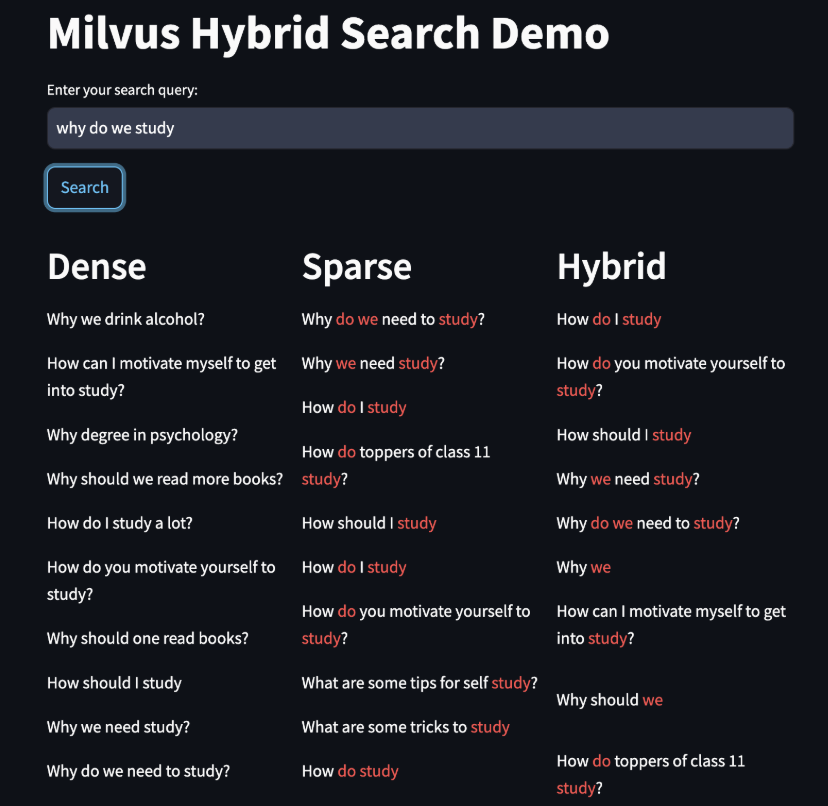

In [18]:
query = '什么是以人为本的座舱'

query_embeddings = ef([query])

我们将首先准备一些有用的函数来运行搜索：

- dense_search只搜索密集向量场
- sparse_search只在稀疏向量场中搜索
- hybrid_search：使用加权 Reranker 在密集向量场和向量场中搜索

In [19]:
from pymilvus import (
    AnnSearchRequest,
    WeightedRanker,
)


def dense_search(col, query_dense_embedding, limit=10):
    search_params = {"metric_type": "IP", "params": {}}
    res = col.search(
        [query_dense_embedding],
        anns_field="dense_vector",
        limit=limit,
        output_fields=["text"],
        param=search_params,
    )[0]
    return [hit.get("text") for hit in res]


def sparse_search(col, query_sparse_embedding, limit=10):
    search_params = {
        "metric_type": "IP",
        "params": {},
    }
    res = col.search(
        [query_sparse_embedding],
        anns_field="sparse_vector",
        limit=limit,
        output_fields=["text"],
        param=search_params,
    )[0]
    return [hit.get("text") for hit in res]


def hybrid_search(
    col,
    query_dense_embedding,
    query_sparse_embedding,
    sparse_weight=1.0,
    dense_weight=1.0,
    limit=10,
):
    dense_search_params = {"metric_type": "IP", "params": {}}
    dense_req = AnnSearchRequest(
        [query_dense_embedding], "dense_vector", dense_search_params, limit=limit
    )
    sparse_search_params = {"metric_type": "IP", "params": {}}
    sparse_req = AnnSearchRequest(
        [query_sparse_embedding], "sparse_vector", sparse_search_params, limit=limit
    )
    rerank = WeightedRanker(sparse_weight, dense_weight)
    res = col.hybrid_search(
        [sparse_req, dense_req], rerank=rerank, limit=limit, output_fields=["text"]
    )[0]
    return [hit.get("text") for hit in res]


In [20]:
dense_results = dense_search(col, query_embeddings["dense"][0])
sparse_results = sparse_search(col, query_embeddings["sparse"]._getrow(0))
hybrid_results = hybrid_search(
    col,
    query_embeddings["dense"][0],
    query_embeddings["sparse"]._getrow(0),
    sparse_weight=0.7,
    dense_weight=1.0,
)


In [21]:
print(dense_results[:3])

['ES9内饰秉承"以⼈为本"的设计理念，打造宁静、舒适、科技感⼗⾜的乘坐空间。内饰设计核⼼要素包括：\n\n- 极简主义设计⻛格，减少物理按键，提供清爽整洁的视觉体验\n- 环保可持续材料应⽤，包括回收纤维⾯料和环保⽪⾰替代品\n- ⼈体⼯程学座椅设计，提供⻓途驾驶的舒适⽀撑\n- 多⾊环境氛围灯，可根据场景和⼼情调节⻋内氛围\n- 声学优化设计，配合主动降噪系统，打造安静驾乘环境\n', '设计团队精⼼打造的细节包括：\n\n- 封闭式前格栅设计，减少⻛阻同时彰显电动⻋特性\n- 隐藏式⻔把⼿，在保证便利性的同时提升整⻋流线型外观\n- 全LED矩阵⼤灯组，配合贯穿式光带，创造独特夜间辨识度\n- 22英⼨空⽓动⼒学轮毂，减少涡流产⽣，提⾼能源效率\n- 全景玻璃⻋顶，提供开阔视野的同时保持优雅⻋⾝⽐例\n\n# 内饰设计：以⼈为本的未来座舱\n', '星际电动在全国已建设超过5000个超级充电站，覆盖主要城市和高速公路网络。ES9车主可享受首年充电服务费减免，以及星际专属快充通道优先权。# 智能座舱\n\n# 中控与显⽰系统\n\nES9配备先进的智能座舱系统，以⽤⼾为中⼼打造沉浸式交互体验：\n\n- 55英⼨超宽曲⾯OLED液晶仪表盘与中控屏\n- 分辨率: 7680×1080像素\n- 刷新率: 120Hz\n- 亮度: 1200尼特\n- 支持HDR10+显⽰\n- 防眩光处理\n- AR增强现实抬头显⽰系统(HUD)\n- 70英⼨等效显⽰⾯积\n- 全⾊彩显⽰\n- 虚拟图像投射距离: 7.5⽶\n- 实时导航路径指引\n- 智能驾驶状态显⽰\n- 后排娱乐系统(⾼配版/性能版标配)']


In [22]:
print(sparse_results[:3])

['设计团队精⼼打造的细节包括：\n\n- 封闭式前格栅设计，减少⻛阻同时彰显电动⻋特性\n- 隐藏式⻔把⼿，在保证便利性的同时提升整⻋流线型外观\n- 全LED矩阵⼤灯组，配合贯穿式光带，创造独特夜间辨识度\n- 22英⼨空⽓动⼒学轮毂，减少涡流产⽣，提⾼能源效率\n- 全景玻璃⻋顶，提供开阔视野的同时保持优雅⻋⾝⽐例\n\n# 内饰设计：以⼈为本的未来座舱\n', 'ES9内饰秉承"以⼈为本"的设计理念，打造宁静、舒适、科技感⼗⾜的乘坐空间。内饰设计核⼼要素包括：\n\n- 极简主义设计⻛格，减少物理按键，提供清爽整洁的视觉体验\n- 环保可持续材料应⽤，包括回收纤维⾯料和环保⽪⾰替代品\n- ⼈体⼯程学座椅设计，提供⻓途驾驶的舒适⽀撑\n- 多⾊环境氛围灯，可根据场景和⼼情调节⻋内氛围\n- 声学优化设计，配合主动降噪系统，打造安静驾乘环境\n', '星际电动在全国已建设超过5000个超级充电站，覆盖主要城市和高速公路网络。ES9车主可享受首年充电服务费减免，以及星际专属快充通道优先权。# 智能座舱\n\n# 中控与显⽰系统\n\nES9配备先进的智能座舱系统，以⽤⼾为中⼼打造沉浸式交互体验：\n\n- 55英⼨超宽曲⾯OLED液晶仪表盘与中控屏\n- 分辨率: 7680×1080像素\n- 刷新率: 120Hz\n- 亮度: 1200尼特\n- 支持HDR10+显⽰\n- 防眩光处理\n- AR增强现实抬头显⽰系统(HUD)\n- 70英⼨等效显⽰⾯积\n- 全⾊彩显⽰\n- 虚拟图像投射距离: 7.5⽶\n- 实时导航路径指引\n- 智能驾驶状态显⽰\n- 后排娱乐系统(⾼配版/性能版标配)']


In [23]:
print(hybrid_results[:3])

['设计团队精⼼打造的细节包括：\n\n- 封闭式前格栅设计，减少⻛阻同时彰显电动⻋特性\n- 隐藏式⻔把⼿，在保证便利性的同时提升整⻋流线型外观\n- 全LED矩阵⼤灯组，配合贯穿式光带，创造独特夜间辨识度\n- 22英⼨空⽓动⼒学轮毂，减少涡流产⽣，提⾼能源效率\n- 全景玻璃⻋顶，提供开阔视野的同时保持优雅⻋⾝⽐例\n\n# 内饰设计：以⼈为本的未来座舱\n', 'ES9内饰秉承"以⼈为本"的设计理念，打造宁静、舒适、科技感⼗⾜的乘坐空间。内饰设计核⼼要素包括：\n\n- 极简主义设计⻛格，减少物理按键，提供清爽整洁的视觉体验\n- 环保可持续材料应⽤，包括回收纤维⾯料和环保⽪⾰替代品\n- ⼈体⼯程学座椅设计，提供⻓途驾驶的舒适⽀撑\n- 多⾊环境氛围灯，可根据场景和⼼情调节⻋内氛围\n- 声学优化设计，配合主动降噪系统，打造安静驾乘环境\n', '星际电动在全国已建设超过5000个超级充电站，覆盖主要城市和高速公路网络。ES9车主可享受首年充电服务费减免，以及星际专属快充通道优先权。# 智能座舱\n\n# 中控与显⽰系统\n\nES9配备先进的智能座舱系统，以⽤⼾为中⼼打造沉浸式交互体验：\n\n- 55英⼨超宽曲⾯OLED液晶仪表盘与中控屏\n- 分辨率: 7680×1080像素\n- 刷新率: 120Hz\n- 亮度: 1200尼特\n- 支持HDR10+显⽰\n- 防眩光处理\n- AR增强现实抬头显⽰系统(HUD)\n- 70英⼨等效显⽰⾯积\n- 全⾊彩显⽰\n- 虚拟图像投射距离: 7.5⽶\n- 实时导航路径指引\n- 智能驾驶状态显⽰\n- 后排娱乐系统(⾼配版/性能版标配)']


## 5.回答

In [24]:
def format_list_with_markers(input_list):
    """
    Formats a list by adding numbered markers ([1], [2], etc.) to each item
    and adding a line break after each item.
    
    Args:
        input_list: A list of strings to format
        
    Returns:
        A single formatted string
    """
    result = ""
    
    for index, item in enumerate(input_list, 1):
        # Add the numbered marker and the item content
        result += f"[{index}] {item}\n"
    
    return result


In [25]:
formatted_references=format_list_with_markers(hybrid_results)

In [26]:
pprint(formatted_references)

('[1] 设计团队精⼼打造的细节包括：\n'
 '\n'
 '- 封闭式前格栅设计，减少⻛阻同时彰显电动⻋特性\n'
 '- 隐藏式⻔把⼿，在保证便利性的同时提升整⻋流线型外观\n'
 '- 全LED矩阵⼤灯组，配合贯穿式光带，创造独特夜间辨识度\n'
 '- 22英⼨空⽓动⼒学轮毂，减少涡流产⽣，提⾼能源效率\n'
 '- 全景玻璃⻋顶，提供开阔视野的同时保持优雅⻋⾝⽐例\n'
 '\n'
 '# 内饰设计：以⼈为本的未来座舱\n'
 '\n'
 '[2] ES9内饰秉承"以⼈为本"的设计理念，打造宁静、舒适、科技感⼗⾜的乘坐空间。内饰设计核⼼要素包括：\n'
 '\n'
 '- 极简主义设计⻛格，减少物理按键，提供清爽整洁的视觉体验\n'
 '- 环保可持续材料应⽤，包括回收纤维⾯料和环保⽪⾰替代品\n'
 '- ⼈体⼯程学座椅设计，提供⻓途驾驶的舒适⽀撑\n'
 '- 多⾊环境氛围灯，可根据场景和⼼情调节⻋内氛围\n'
 '- 声学优化设计，配合主动降噪系统，打造安静驾乘环境\n'
 '\n'
 '[3] 星际电动在全国已建设超过5000个超级充电站，覆盖主要城市和高速公路网络。ES9车主可享受首年充电服务费减免，以及星际专属快充通道优先权。# '
 '智能座舱\n'
 '\n'
 '# 中控与显⽰系统\n'
 '\n'
 'ES9配备先进的智能座舱系统，以⽤⼾为中⼼打造沉浸式交互体验：\n'
 '\n'
 '- 55英⼨超宽曲⾯OLED液晶仪表盘与中控屏\n'
 '- 分辨率: 7680×1080像素\n'
 '- 刷新率: 120Hz\n'
 '- 亮度: 1200尼特\n'
 '- 支持HDR10+显⽰\n'
 '- 防眩光处理\n'
 '- AR增强现实抬头显⽰系统(HUD)\n'
 '- 70英⼨等效显⽰⾯积\n'
 '- 全⾊彩显⽰\n'
 '- 虚拟图像投射距离: 7.5⽶\n'
 '- 实时导航路径指引\n'
 '- 智能驾驶状态显⽰\n'
 '- 后排娱乐系统(⾼配版/性能版标配)\n'
 '[4] # 用户口碑\n'
 '\n'
 '# 优点TOP5（根据用户反馈）：\n'
 '\n'
 '1. 超长续航能力，减少里程焦虑\n'
 '2. 智能驾驶体验出色，大幅减轻驾驶疲劳\n'
 '3. 智能座舱系统直观易用\n'
 '4. 加速性能强

In [27]:
prompt = f"""
你是一个智能助手，负责根据用户的问题和提供的参考内容生成回答。请严格按照以下要求生成回答：
1. 回答必须基于提供的参考内容。
2. 在回答中，每一块内容都必须标注引用的来源，格式为：[引用编号]。例如：[1] 表示引用自第1条参考内容。
3. 如果没有参考内容，请明确说明。如果没有参考知识，根据你自己的知识进行回答

参考内容：
{formatted_references}

用户问题：{query}
"""

print(prompt)


你是一个智能助手，负责根据用户的问题和提供的参考内容生成回答。请严格按照以下要求生成回答：
1. 回答必须基于提供的参考内容。
2. 在回答中，每一块内容都必须标注引用的来源，格式为：[引用编号]。例如：[1] 表示引用自第1条参考内容。
3. 如果没有参考内容，请明确说明。如果没有参考知识，根据你自己的知识进行回答

参考内容：
[1] 设计团队精⼼打造的细节包括：

- 封闭式前格栅设计，减少⻛阻同时彰显电动⻋特性
- 隐藏式⻔把⼿，在保证便利性的同时提升整⻋流线型外观
- 全LED矩阵⼤灯组，配合贯穿式光带，创造独特夜间辨识度
- 22英⼨空⽓动⼒学轮毂，减少涡流产⽣，提⾼能源效率
- 全景玻璃⻋顶，提供开阔视野的同时保持优雅⻋⾝⽐例

# 内饰设计：以⼈为本的未来座舱

[2] ES9内饰秉承"以⼈为本"的设计理念，打造宁静、舒适、科技感⼗⾜的乘坐空间。内饰设计核⼼要素包括：

- 极简主义设计⻛格，减少物理按键，提供清爽整洁的视觉体验
- 环保可持续材料应⽤，包括回收纤维⾯料和环保⽪⾰替代品
- ⼈体⼯程学座椅设计，提供⻓途驾驶的舒适⽀撑
- 多⾊环境氛围灯，可根据场景和⼼情调节⻋内氛围
- 声学优化设计，配合主动降噪系统，打造安静驾乘环境

[3] 星际电动在全国已建设超过5000个超级充电站，覆盖主要城市和高速公路网络。ES9车主可享受首年充电服务费减免，以及星际专属快充通道优先权。# 智能座舱

# 中控与显⽰系统

ES9配备先进的智能座舱系统，以⽤⼾为中⼼打造沉浸式交互体验：

- 55英⼨超宽曲⾯OLED液晶仪表盘与中控屏
- 分辨率: 7680×1080像素
- 刷新率: 120Hz
- 亮度: 1200尼特
- 支持HDR10+显⽰
- 防眩光处理
- AR增强现实抬头显⽰系统(HUD)
- 70英⼨等效显⽰⾯积
- 全⾊彩显⽰
- 虚拟图像投射距离: 7.5⽶
- 实时导航路径指引
- 智能驾驶状态显⽰
- 后排娱乐系统(⾼配版/性能版标配)
[4] # 用户口碑

# 优点TOP5（根据用户反馈）：

1. 超长续航能力，减少里程焦虑
2. 智能驾驶体验出色，大幅减轻驾驶疲劳
3. 智能座舱系统直观易用
4. 加速性能强劲，驾驶乐趣十足
5. 静谧舒适的乘坐体验

# 改进建议TOP3：

1. 充电网络覆盖还可继续完善
2. 部分功

In [28]:
from openai import OpenAI
client_gpt = OpenAI(api_key='')

completion_gpt = client_gpt.chat.completions.create(
    model="gpt-4o",
    messages=[
        {
            "role": "user",
            "content": prompt
        }
    ]
)

print(completion_gpt.choices[0].message.content)

“以人为本的座舱”是指在汽车内饰设计中，充分考虑乘客的舒适性、便利性和个性化需求。以人为本的座舱通常具有以下特点：

1. **极简主义设计风格**：减少物理按键，提供清爽整洁的视觉体验，让乘客在车内感到轻松[2]。

2. **环保可持续材料**：使用环保材料，如回收纤维面料和环保皮革替代品，增强环保理念[2][10]。

3. **人体工程学设计**：座椅根据人体工程学设计，提供长途驾驶的舒适支撑，包括可调节座椅、记忆功能、加热和通风等[5]。

4. **声学优化**：具备主动降噪系统，保证车内的安静环境，提高乘坐的舒适度[2]。

5. **多色环境氛围灯**：可以根据场景和心情调节车内氛围，增强乘客的愉悦感[2]。

6. **智能科技应用**：智能交互系统、语音助手、手势控制等科技应用，让乘客享受更便捷的操作[8][9]。

这些设计和功能结合起来，为乘客提供一个宁静、舒适、科技感十足的乘坐空间，使驾乘体验更加愉悦和舒适[2]。


## 6.封装一个rag函数

In [29]:
def retrieval(query):
    query_embeddings = ef([query])
    hybrid_results = hybrid_search(
        col,
        query_embeddings["dense"][0],
        query_embeddings["sparse"]._getrow(0),
        sparse_weight=0.7,
        dense_weight=1.0,
    )  
    return hybrid_results

In [30]:
def rag(query):

    formatted_references=format_list_with_markers(retrieval(query))
    
    prompt = f"""
    你是一个智能助手，负责根据用户的问题和提供的参考内容生成回答。请严格按照以下要求生成回答：
    1. 回答必须基于提供的参考内容。
    2. 在回答中，每一块内容都必须标注引用的来源，格式为：[引用编号]。例如：[1] 表示引用自第1条参考内容。
    3. 如果没有参考内容，请明确说明。如果没有参考知识，根据你自己的知识进行回答
    
    参考内容：
    {formatted_references}
    
    用户问题：{query}
    """
    client = OpenAI(api_key='')

    completion = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
                "role": "user",
                "content": prompt
            }
        ]
    )
    # print('-'*130)
    # pprint(formatted_references)
    
    return formatted_references,completion.choices[0].message.content
    

In [31]:
reference,result=rag('介绍一下技术规格')
print(result)

根据提供的参考内容，以下是技术规格的介绍：

1. **传感器配置**：车辆配备了多种传感器，包括5个毫米波雷达、12个超声波雷达、14个高清摄像头、2个红外摄像头、1个激光雷达、1个高精度定位器和3个惯性测量单元。这些传感器支持远距离、近距离探测及环境扫描等功能[1]。

2. **材料和制造工艺**：车辆由35%的高强度钢、45%的铝合金和10%的碳纤维复合材料（性能版）以及10%的工程塑料制成，使用了一体式压铸技术、激光焊接工艺和先进涂装工艺来提高结构强度和防腐蚀性能[2]。

3. **充电系统**：支持多种充电方式，包括家用220V充电及多种壁挂充电桩，充电时间从家用插座的34-68小时到22kW壁挂桩的3.5-7小时不等[3]。

4. **动力和电池性能**（性能版）：
   - 配备三电机四驱系统，前双异步电机与后高性能永磁电机组合，系统最大功率为650kW，最大扭矩1050Nm，0-100km/h加速仅需3.2秒[6]。
   - 使用150kWh半固态电池，具备快速充电能力，快充时间为18分钟[5][10]。

5. **空气动力学设计**：车辆采用低风阻设计，风阻系数为0.2164，配备22英寸空气动力学轮毂以减少涡流产生，增加能效[8]。

6. **车内设计与功能**：内饰设计以人为本，配备全景玻璃车顶，全LED矩阵大灯组以及28扬声器沉浸式音响系统。可选装多种选装包以满足个性化需求[10]。

这些技术规格凸显了车辆在感知、材料、充电、动力、空气动力学和内饰设计上的综合性能优势。


# 二、网络检索模块

# 1.网络检索

- 有一些无关紧要的信息，去噪声
- 返回的网页太多了，找到最相关的网页信息
- 提取的时候速度很慢，怎么解决呢

![image.png](chinese-flowchart.svg)

!pip install numpy==1.26.4

In [34]:
from websearch.src.retrieval import web_retrieval


In [44]:
web_query="小米汽车SU7的配置"

In [45]:
from time import time
s=time()
new_web_result=web_retrieval(web_query)
e=time()
print(e-s)

Starting web crawler thread 0
Thread 0 completed! Time consumed: 0.00s
Starting web crawler thread 1
Starting web crawler thread 2
Starting web crawler thread 3
Starting web crawler thread 4
Starting web crawler thread 5
Starting web crawler thread 6
Starting web crawler thread 7
Starting web crawler thread 8
Starting web crawler thread 9
Thread 2 completed! Time consumed: 0.17s
Thread 8 completed! Time consumed: 0.21s
Thread 4 completed! Time consumed: 0.30s
Thread 3 completed! Time consumed: 0.31s
Thread 1 completed! Time consumed: 0.36s
Thread 9 completed! Time consumed: 0.39s
Thread 7 completed! Time consumed: 0.43s
Thread 6 completed! Time consumed: 0.66s
Thread 5 completed! Time consumed: 1.68s
7.656067132949829


In [46]:
print(new_web_result)

[Document(page_content="^ 13.0 13.1 24小时88898台！最新，小米汽车回应！. 中国经济网微信公众号. 2024-03-30  [2024-03-30]. （原始内容存档于2024-04-03）.\xa0\n\n^ 首批小米汽车SU7开始交付，雷军亲自为车主开车门. IT之家.   [2024-04-03].\xa0\n\n^ 小米首款电动汽车SU7正式版在北京和深圳启动交付_观点_雷军_两地. www.sohu.com.   [2024-04-25].\xa0\n\n^ e公司 王小伟. 小米汽车大消息！拿下独立造车资质. 证券时报网. 2024-07-12  [2024-07-12].\xa0\n\n^ 快科技. 第一批小米SU7 Ultra已有车标被扣！24K金达盗窃量刑标准. finance.sina.com.cn. 2025-03-10  [2025-03-10].\xa0\n\n^ Feijter, Tycho de. From Phones To Cars: Xiaomi MS11 Leaked In China. CarNewsChina.com. 2023-01-28  [2023-11-22]. （原始内容存档于2023-11-22） （美国英语）.\xa0\n\n^ 19.0 19.1 Lye, Gerard. Xiaomi SU7 debuts in China – brand's first EV; up to 673 PS, 838 Nm, 800 km range, 265 km/h top speed. Paul Tan's Automotive News. 2023-12-28  [2023-12-28]. （原始内容存档于2024-01-02） （美国英语）.\xa0\n\n^ 有无激光雷达差别大不大：小米Pilot Pro/Max高速领航区别揭秘_城市_测试_全国. www.sohu.com.   [2024-04-05]. （原始内容存档于2024-04-05）.\xa0\n\n^ Xiaomi SU7. Automachi. 2023-12-28  [2024-01-06]. （原始内容存档于2024-01-06）.", metadata={'url': 'https://zh.wiki

# 2. 封装一个网络搜索函数

In [47]:
def web_search_answer(query):

    web_reference=web_retrieval(query)
    
    prompt = f"""
    
    Web 搜索结果：
    {web_reference}
    
    指令：你是一个/一名销售助手。使用提供的网络搜索结果，对给定的查询写一个全面而详细的回复。
    确保在引用后使用 [number] 标记引用。
    在回答的最后，列出带索引的相应参考文献，每个参考文献包含网络搜索结果中的网址和引用句子，按照您在上面标记的顺序排列，这些句子应该与网络搜索结果中的完全相同。
    以下是参考文献的示例：
        [1] 网址：https://www.pocketgamer.biz/news/81670/tencent-and-netease-dominated-among-chinas-top-developers-in-q1/
            引用句子：腾讯在本季度占据了国内市场收入的大约50%，相比之下2022年第一季度为40%。
    
    查询：{query}

    请你过滤掉检索结果中的不相关性的部分进行回答，如果没有相关的部分，按照你自己的知识进行回答
    """
    client = OpenAI(api_key='')

    completion = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
                "role": "user",
                "content": prompt
            }
        ]
    )

    
    return completion.choices[0].message.content

In [48]:
query="小米SU7的发动机"
print(web_search_answer(query))

Starting web crawler thread 0Starting web crawler thread 1

Starting web crawler thread 2
Starting web crawler thread 3
Starting web crawler thread 4
Starting web crawler thread 5
Starting web crawler thread 6
Starting web crawler thread 7
Starting web crawler thread 8
Starting web crawler thread 9
Thread 2 completed! Time consumed: 0.15s
Thread 5 completed! Time consumed: 0.17s
Thread 0 completed! Time consumed: 0.19s
Thread 7 completed! Time consumed: 0.22s
Thread 1 completed! Time consumed: 0.33s
Thread 8 completed! Time consumed: 0.40s
Thread 3 completed! Time consumed: 0.51s
Thread 6 completed! Time consumed: 0.88s
Thread 9 completed! Time consumed: 1.69s
Thread 4 completed! Time consumed: 1.92s
根据当前的小米SU7的信息，这款车没有传统意义上的发动机，因为它是小米首款电动汽车。小米SU7作为一款电动汽车，采用的是电动机而非内燃机。具体到性能方面，小米SU7采用的电动机能够提供高达673 PS的功率，以及838 Nm的扭矩，并具备800公里的续航能力和最高时速达到265 km/h。[1]

参考文献：
[1] 网址：https://zh.wikipedia.org/zh-cn/%E5%B0%8F%E7%B1%B3SU7
    引用句子：Xiaomi SU7 debuts in China – brand's first EV; up to 673 PS, 838 

# 三、构建一个Agent

![image.png](ai-agent-flowchart.svg)

- 记忆模块memory
- 规划模块plan
- 任务状态state
- 执行模块tools
- 输出模块assistant

## 1.先定义一些辅助函数

In [70]:
from openai import OpenAI
import os

def middle_json_model(prompt):

    client = OpenAI(
        # 若没有配置环境变量，请用百炼API Key将下行替换为：api_key="sk-xxx",
        api_key='', 
        base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
    )
    completion = client.chat.completions.create(
        model="qwen-plus", # 此处以qwen-plus为例，可按需更换模型名称。模型列表：https://help.aliyun.com/zh/model-studio/getting-started/models
        messages=[
            {'role': 'system', 'content': 'You are a helpful assistant.'},
            {'role': 'user', 'content': prompt}],
        response_format={"type": "json_object"}
        )
        
    return completion.choices[0].message.content

In [102]:
import re
import json

def extract_json_content(input_str):
    """
    提取字符串中第一个"["和最后一个"]"之间的内容（包括中括号）
    
    Args:
        input_str (str): 需要处理的输入字符串
    
    Returns:
        str or None: 提取的JSON内容，如果没有匹配则返回None
    """
    # 使用正则表达式匹配第一个"["到最后一个"]"之间的内容
    # [\s\S]* 匹配任意字符（包括换行符）
    pattern = r'(\[[\s\S]*\])'
    match = re.search(pattern, input_str)
    
    # 如果匹配成功，返回匹配的内容；否则返回None
    return match.group(1) if match else None

## 2.开始正式的agent流程

In [127]:
#记忆模块memory，用来储存搜索到的信息
memory_global=[]

In [111]:
#规划模块plan
import json

def agent_plan(query):
    prompt='''

你是一个专业的汽车销售助手的规划模块。你的任务是：
1. 分析用户的查询:{0}
2. 基于已有的信息，决定使用哪个工具来查询以获得更多需要的信息（本地文档搜索或网络搜索）
3. 将用户的原始查询拆解或延伸为1-2个相关问题，以获取更全面的信息


## 可用工具
1. **本地文档搜索**：搜索本地星辰电动ES9的文档，包含以下章节：
   - 产品概述
   - 设计理念
   - 技术规格
   - 驱动系统
   - 电池与充电
   - 智能座舱
   - 智能驾驶
   - 安全系统
   - 车身结构
   - 舒适性与便利性
   - 版本与配置
   - 价格与购买信息
   - 售后服务
   - 环保贡献
   - 用户评价
   - 竞品对比
   - 常见问题
   - 联系方式

2. **网络搜索**：在互联网上搜索相关信息

## 工具选择规则
- 当查询明确涉及星辰电动ES9的具体信息、参数、功能或服务时，优先使用**本地文档搜索**
- 当查询涉及以下情况时，使用**网络搜索**：
  - 与其他品牌车型的详细对比
  - 最新市场动态或新闻
  - 非官方的用户体验或评测
  - 星辰电动ES9文档中可能没有的信息
  - 需要实时数据（如当前市场价格波动等）

## prompt延伸的规则
- 本地检索的查询扩展侧重于产品信息的深度查询
- 网络检索的查询扩展侧重于本地无法检索到的信息

## 输出格式
你的输出应该是一个JSON格式的列表，每个项目包含：
1. `action_name`：工具名称（"本地文档搜索"或"网络搜索"）
2. `prompts`：问题列表，第一个是原始查询，后面是拆解或延伸的问题
[
  {{
    "action_name": "工具名称",
    "prompts": [
      "原始查询",
      "拆解/延伸问题1",
      "拆解/延伸问题2",
      "拆解/延伸问题3"
    ]
  }}
]


## 示例

### 示例1：关于车辆规格的查询
用户：星辰电动ES9的续航里程是多少？

输出：
[
  {{
    "action_name": "本地文档搜索",
    "prompts": [
      "星辰电动ES9的续航里程是多少？",
      "星辰电动ES9的电池容量是多少？",
      "星辰电动ES9不同版本的续航里程有何区别？"
    ]
  }}
]


### 示例2：关于市场比较的查询
用户：星辰电动ES9和特斯拉Model Y相比怎么样？

输出：
[
  {{
    "action_name": "本地文档搜索",
    "prompts": [
      "星辰电动ES9的主要优势和特点是什么？",
      "星辰电动ES9的技术规格和配置有哪些？"
    ]
  }},
  {{
    "action_name": "网络搜索",
    "prompts": [
      "特斯拉Model Y主要优势和特点？",
      "特斯拉Model Y最新规格和价格",
      "特斯拉Model Y技术规格和配置有哪些"
    ]
  }}
]


### 示例3：关于日常问题
用户：你好
这种情况下都不需要调用，则输出为None

只需要输出JSON的部分，前后不要输出任何信息

'''.format(query,memory)
    result=(middle_json_model(prompt))
    print(result)
    json_list=extract_json_content(result)
    try:
        structure_output=json.loads(json_list)
    except:
        structure_output = None

    return structure_output
        
    

In [137]:
user_query='比较一下和华为汽车的优劣势'

In [112]:
action_tool=agent_plan(user_query)
print(action_tool)

[
  {
    "action_name": "本地文档搜索",
    "prompts": [
      "比较一下星辰电动ES9和华为汽车的优劣势",
      "星辰电动ES9的技术规格和配置有哪些优势？",
      "星辰电动ES9在智能驾驶和智能座舱方面有哪些特点？"
    ]
  },
  {
    "action_name": "网络搜索",
    "prompts": [
      "华为汽车的主要优势和特点是什么？",
      "华为汽车的最新技术规格和市场反馈如何？",
      "华为汽车与星辰电动ES9在价格、性能和功能上的对比分析"
    ]
  }
]
[{'action_name': '本地文档搜索', 'prompts': ['比较一下星辰电动ES9和华为汽车的优劣势', '星辰电动ES9的技术规格和配置有哪些优势？', '星辰电动ES9在智能驾驶和智能座舱方面有哪些特点？']}, {'action_name': '网络搜索', 'prompts': ['华为汽车的主要优势和特点是什么？', '华为汽车的最新技术规格和市场反馈如何？', '华为汽车与星辰电动ES9在价格、性能和功能上的对比分析']}]


In [113]:
type(action_tool)

list

In [122]:
#任务状态state
def adjust_format(original_data):
    """
    调整数据格式，使每个action_name只搭配一个prompt
    
    参数:
    original_data (list): 原始数据，每个action_name对应多个prompts
    
    返回:
    list: 调整后的数据，每个action_name只对应一个prompt
    """
    adjusted_data = []
    
    for item in original_data:
        action_name = item['action_name']
        prompts = item['prompts']
        
        # 为每个prompt创建一个新的字典
        for prompt in prompts:
            adjusted_item = {
                'action_name': action_name,
                'prompt': prompt
            }
            adjusted_data.append(adjusted_item)
    
    return adjusted_data

if action_tool:
    adjusted_tools = adjust_format(action_tool)
    actions=adjusted_tools
else:
    actions=[]

In [129]:
actions

[{'action_name': '本地文档搜索', 'prompt': '比较一下星辰电动ES9和华为汽车的优劣势'},
 {'action_name': '本地文档搜索', 'prompt': '星辰电动ES9的技术规格和配置有哪些优势？'},
 {'action_name': '本地文档搜索', 'prompt': '星辰电动ES9在智能驾驶和智能座舱方面有哪些特点？'},
 {'action_name': '网络搜索', 'prompt': '华为汽车的主要优势和特点是什么？'},
 {'action_name': '网络搜索', 'prompt': '华为汽车的最新技术规格和市场反馈如何？'},
 {'action_name': '网络搜索', 'prompt': '华为汽车与星辰电动ES9在价格、性能和功能上的对比分析'}]

In [131]:
#执行模块tools,依次执行actions内的动作，根据action_name判断执行函数web_search_answer()，还是rag()
def process_actions(actions):
    """
    处理动作列表函数
    
    Args:
        actions: 动作列表，每个动作包含action_name和prompt
        
    Returns:
        memory: 包含每次调用结果的记忆列表
    """
    # 初始化记忆列表
    memory = []
    
    # 依次处理每个动作
    for action in actions:
        action_name = action['action_name']
        prompt = action['prompt']
        
        print(f'正在执行{action_name}: "{prompt}"')
        
        try:
            # 根据动作类型调用相应的函数
            if action_name == '本地文档搜索':
                result = rag(prompt)
            elif action_name == '网络搜索':
                result = web_search_answer(prompt)
            else:
                result = f"未知的动作类型: {action_name}"
            
            # 将结果添加到记忆中
            memory_item = {
                "提问": prompt,
                "结果": result
            }
            memory.append(memory_item)
            
            # 输出结果
            print(f"提问：{prompt}")
            print(f"结果：{result}")
            print("-------------------")
            
        except Exception:
            # 如果执行失败，静默处理，继续下一轮循环
            print("-------------------")
            continue
    
    print("所有执行动作已完成，结果已添加到memory中。")
    return memory
    

In [132]:
memory_new=process_actions(actions)

正在执行本地文档搜索: "比较一下星辰电动ES9和华为汽车的优劣势"
提问：比较一下星辰电动ES9和华为汽车的优劣势
结果：('[1] # 产品概述\n\n星⾠电动ES9是星⾠汽⻋公司推出的旗舰级纯电动智能SUV，代表了当前电动汽⻋领域的最⾼技术⽔平。ES9采⽤全新第四代电动平台架构，集成了前沿电池技术、智能驾驶辅助系统和创新交互体验，为⽤⼾提供安全、⾼效、舒适的出⾏解决⽅案。\n\nES9以"科技融⼊⽣活，电动改变未来"为产品理念，通过⽆缝连接⻋辆、⽤⼾和环境，创造全⽅位的智能移动体验。⽆论是⽇常通勤、⻓途旅⾏还是家庭出游，ES9都能满⾜现代⽤⼾多样化的⽤⻋需求。\n\n[2] 作为星⾠汽⻋的旗舰产品，ES9凝聚了公司⼗年电动汽⻋研发经验，是智能电动出⾏的典范之作。# 设计理念\n\n# 外观设计：未来主义与空⽓动⼒学的完美融合\n\nES9的外观设计由国际知名设计师团队主导，采⽤"流体动⼒学"设计语⾔，将未来感与实⽤性完美结合。⻋⾝线条流畅优雅，同时实现了0.21的超低⻛阻系数，处于全球SUV领先⽔平。\n\n[3] # 星⾠电动ES9·未来旗舰电动SUV产品介绍\n\n# ⽬录\n\n1. 产品概述\n2. 设计理念\n3. 技术规格\n4. 驱动系统\n5. 电池与充电\n6. 智能座舱\n7. 智能驾驶\n8. 安全系统\n9. ⻋⾝结构\n10. 舒适性与便利性\n11. 版本与配置\n12. 价格与购买信息\n13. 售后服务\n14. 环保贡献\n15. ⽤⼾评价\n16. 竞品对⽐\n17. 常⻅问题\n18. 联系⽅式\n\n[4] # 优势分析\n\n星⾠ES9相⽐竞品具有以下显著优势：\n\n1. 电池技术：半固态电池技术领先⾏业，能量密度更⾼，充电速度更快\n2. 智能驾驶：⾃研Nebula芯⽚算⼒⾏业领先，⽀持更⾼级别⾃动驾驶功能\n3. 数字座舱：55英⼨超宽曲⾯屏幕创新设计，交互体验领先同级产品\n4. 充电⽣态：全国超过5000个超充站点，充电⽅便程度显著⾼于竞品\n5. 材料⼯艺：⼤量采⽤⾼强度铝合⾦与碳纤维复合材料，轻量化效果突出\n\n[5] # 道路救援\n\n星⾠电动提供全天候道路救援服务：\n\n- 24/7全天候救援热线\n- 全国覆盖的救援⽹络\n- 免费拖⻋服务 (最远100公⾥)\n- 应急充电服务\n- 轮胎更

/var/folders/bw/873390812n94kxhtk6pxt9240000gn/T/ipykernel_2470/3392316868.py:1: RuntimeWarning: coroutine 'process_actions' was never awaited
  memory_new=process_actions(actions)


In [150]:
memory_global=[]
memory_global.extend(memory_new[1:])

In [151]:
memory_global

[{'提问': '星辰电动ES9的技术规格和配置有哪些优势？',
  '结果': ('[1] # 产品概述\n\n星⾠电动ES9是星⾠汽⻋公司推出的旗舰级纯电动智能SUV，代表了当前电动汽⻋领域的最⾼技术⽔平。ES9采⽤全新第四代电动平台架构，集成了前沿电池技术、智能驾驶辅助系统和创新交互体验，为⽤⼾提供安全、⾼效、舒适的出⾏解决⽅案。\n\nES9以"科技融⼊⽣活，电动改变未来"为产品理念，通过⽆缝连接⻋辆、⽤⼾和环境，创造全⽅位的智能移动体验。⽆论是⽇常通勤、⻓途旅⾏还是家庭出游，ES9都能满⾜现代⽤⼾多样化的⽤⻋需求。\n\n[2] 作为星⾠汽⻋的旗舰产品，ES9凝聚了公司⼗年电动汽⻋研发经验，是智能电动出⾏的典范之作。# 设计理念\n\n# 外观设计：未来主义与空⽓动⼒学的完美融合\n\nES9的外观设计由国际知名设计师团队主导，采⽤"流体动⼒学"设计语⾔，将未来感与实⽤性完美结合。⻋⾝线条流畅优雅，同时实现了0.21的超低⻛阻系数，处于全球SUV领先⽔平。\n\n[3] # 优势分析\n\n星⾠ES9相⽐竞品具有以下显著优势：\n\n1. 电池技术：半固态电池技术领先⾏业，能量密度更⾼，充电速度更快\n2. 智能驾驶：⾃研Nebula芯⽚算⼒⾏业领先，⽀持更⾼级别⾃动驾驶功能\n3. 数字座舱：55英⼨超宽曲⾯屏幕创新设计，交互体验领先同级产品\n4. 充电⽣态：全国超过5000个超充站点，充电⽅便程度显著⾼于竞品\n5. 材料⼯艺：⼤量采⽤⾼强度铝合⾦与碳纤维复合材料，轻量化效果突出\n\n[4] # 星⾠电动ES9·未来旗舰电动SUV产品介绍\n\n# ⽬录\n\n1. 产品概述\n2. 设计理念\n3. 技术规格\n4. 驱动系统\n5. 电池与充电\n6. 智能座舱\n7. 智能驾驶\n8. 安全系统\n9. ⻋⾝结构\n10. 舒适性与便利性\n11. 版本与配置\n12. 价格与购买信息\n13. 售后服务\n14. 环保贡献\n15. ⽤⼾评价\n16. 竞品对⽐\n17. 常⻅问题\n18. 联系⽅式\n\n[5] 星际电动在全国已建设超过5000个超级充电站，覆盖主要城市和高速公路网络。ES9车主可享受首年充电服务费减免，以及星际专属快充通道优先权。# 智能座舱\n\n# 中控与显⽰系统\n\nES9配备先进的智能座舱系统，以⽤⼾为中⼼打

In [152]:
#输出模块assitant

In [153]:
from openai import OpenAI
import os

# 初始化OpenAI客户端
def final_answer(memory_global,user_query):
    client = OpenAI(
        # 如果没有配置环境变量，请用百炼API Key替换：api_key="sk-xxx"
        api_key = 'sk-f02db5a079ab41588b1cab09ad2777a2',
        base_url="https://dashscope.aliyuncs.com/compatible-mode/v1"
    )
    
    reasoning_content = ""  # 定义完整思考过程
    answer_content = ""     # 定义完整回复
    is_answering = False   # 判断是否结束思考过程并开始回复
    
    
    final_prompt=f'''
        你是一个星辰电动ES9的智能销售助手，负责根据用户的问题和提供的参考内容生成回答。请严格按照以下要求生成回答：
        基于提供的参考内容进行回答，如果原文没有参考内容,根据你自己的知识进行回答
        你需要用有打动力的销售的语言进行输出，突出星辰电动的优势
        
        参考内容：
        {memory_global}
        
        用户问题：{user_query}
    
    '''
    print(final_prompt)    
    print('-'*130)
    
    # 创建聊天完成请求
    completion = client.chat.completions.create(
        model="deepseek-r1",  # 此处以 deepseek-r1 为例，可按需更换模型名称
        messages=[
            {"role": "user", "content": final_prompt}
        ],
        stream=True,
        # 解除以下注释会在最后一个chunk返回Token使用量
        # stream_options={
        #     "include_usage": True
        # }
    )
    
    print("\n" + "=" * 20 + "思考过程" + "=" * 20 + "\n")
    
    for chunk in completion:
        # 如果chunk.choices为空，则打印usage
        if not chunk.choices:
            print("\nUsage:")
            print(chunk.usage)
        else:
            delta = chunk.choices[0].delta
            # 打印思考过程
            if hasattr(delta, 'reasoning_content') and delta.reasoning_content != None:
                print(delta.reasoning_content, end='', flush=True)
                reasoning_content += delta.reasoning_content
            else:
                # 开始回复
                if delta.content != "" and is_answering == False:
                    print("\n" + "=" * 20 + "完整回复" + "=" * 20 + "\n")
                    is_answering = True
                # 打印回复过程
                print(delta.content, end='', flush=True)
                answer_content += delta.content
    
    # print("=" * 20 + "完整思考过程" + "=" * 20 + "\n")
    # print(reasoning_content)
    # print("=" * 20 + "完整回复" + "=" * 20 + "\n")
    # print(answer_content)

In [154]:
final_answer(memory_global,user_query)


        你是一个星辰电动ES9的智能销售助手，负责根据用户的问题和提供的参考内容生成回答。请严格按照以下要求生成回答：
        基于提供的参考内容进行回答，如果原文没有参考内容,根据你自己的知识进行回答
        你需要用有打动力的销售的语言进行输出，突出星辰电动的优势
        
        参考内容：
        [{'提问': '星辰电动ES9的技术规格和配置有哪些优势？', '结果': ('[1] # 产品概述\n\n星⾠电动ES9是星⾠汽⻋公司推出的旗舰级纯电动智能SUV，代表了当前电动汽⻋领域的最⾼技术⽔平。ES9采⽤全新第四代电动平台架构，集成了前沿电池技术、智能驾驶辅助系统和创新交互体验，为⽤⼾提供安全、⾼效、舒适的出⾏解决⽅案。\n\nES9以"科技融⼊⽣活，电动改变未来"为产品理念，通过⽆缝连接⻋辆、⽤⼾和环境，创造全⽅位的智能移动体验。⽆论是⽇常通勤、⻓途旅⾏还是家庭出游，ES9都能满⾜现代⽤⼾多样化的⽤⻋需求。\n\n[2] 作为星⾠汽⻋的旗舰产品，ES9凝聚了公司⼗年电动汽⻋研发经验，是智能电动出⾏的典范之作。# 设计理念\n\n# 外观设计：未来主义与空⽓动⼒学的完美融合\n\nES9的外观设计由国际知名设计师团队主导，采⽤"流体动⼒学"设计语⾔，将未来感与实⽤性完美结合。⻋⾝线条流畅优雅，同时实现了0.21的超低⻛阻系数，处于全球SUV领先⽔平。\n\n[3] # 优势分析\n\n星⾠ES9相⽐竞品具有以下显著优势：\n\n1. 电池技术：半固态电池技术领先⾏业，能量密度更⾼，充电速度更快\n2. 智能驾驶：⾃研Nebula芯⽚算⼒⾏业领先，⽀持更⾼级别⾃动驾驶功能\n3. 数字座舱：55英⼨超宽曲⾯屏幕创新设计，交互体验领先同级产品\n4. 充电⽣态：全国超过5000个超充站点，充电⽅便程度显著⾼于竞品\n5. 材料⼯艺：⼤量采⽤⾼强度铝合⾦与碳纤维复合材料，轻量化效果突出\n\n[4] # 星⾠电动ES9·未来旗舰电动SUV产品介绍\n\n# ⽬录\n\n1. 产品概述\n2. 设计理念\n3. 技术规格\n4. 驱动系统\n5. 电池与充电\n6. 智能座舱\n7. 智能驾驶\n8. 安全系统\n9. ⻋⾝结构\n10. 舒适性与便利性\n11. 版本与配置\n12. 价格与购买信息\n13.

## 3.封装为一个Agent

In [159]:
#整个流程中3个agent相互协同，plan，action，answer

def agent(user_query):
    #记忆模块
    memory_global=[]
    #获得执行清单
    action_tool=agent_plan(user_query)
    if action_tool:
        adjusted_tools = adjust_format(action_tool)
        actions=adjusted_tools
    else:
        actions=[]
    if actions:
        #进行任务执行
        memory_new=process_actions(actions)#这个要替换为执行的rag和websearch的函数名称
        memory_global.extend(memory_new[1:])
    final_answer(memory_global,user_query)
        


In [160]:
user_query='比较一下和华为汽车的优劣势'

In [161]:
agent(user_query)

[
  {
    "action_name": "本地文档搜索",
    "prompts": [
      "比较一下和华为汽车的优劣势",
      "星辰电动ES9在智能驾驶、智能座舱方面的技术特点是什么？",
      "星辰电动ES9与华为合作车型的配置对比情况如何？"
    ]
  },
  {
    "action_name": "网络搜索",
    "prompts": [
      "华为汽车的主要优势和特点是什么？",
      "华为汽车最新规格和价格是多少？",
      "华为汽车在智能驾驶和智能座舱方面有哪些亮点？"
    ]
  }
]
正在执行本地文档搜索: "比较一下和华为汽车的优劣势"
提问：比较一下和华为汽车的优劣势
结果：('[1] # 用户口碑\n\n# 优点TOP5（根据用户反馈）：\n\n1. 超长续航能力，减少里程焦虑\n2. 智能驾驶体验出色，大幅减轻驾驶疲劳\n3. 智能座舱系统直观易用\n4. 加速性能强劲，驾驶乐趣十足\n5. 静谧舒适的乘坐体验\n\n# 改进建议TOP3：\n\n1. 充电网络覆盖还可继续完善\n2. 部分功能学习曲线偏陡\n3. 后备箱空间可进一步优化\n\n[2] # 竞品对比\n\n[3] 与主要竞争对手对比|性能指标|星辰|竞品4|竞品8|竞品6|\n|---|---|---|---|---|\n|最大功率|600-8501|500-6801|620-7801|3.2-5.9秒|\n|充电速度|18-30分钟|25-40分钟|22-35分钟|20-32分钟|\n|智能驾驶等级|12.5-13|12-12.5|12-12.5|12-12.5|\n|中控屏尺寸|55英寸曲面|15.6英寸|17.3英寸|12.3英寸|\n|售价区间|32.9-56.9万|34.8-59.8万|30.8-48.9万|35.8-62.9万|\n|质保政策|6年/15万公里|5年/12万公里|6年/15万公里|4年/10万公里|\n\n[4] |项目|满意度评分|行业平均|\n|---|---|---|\n|整体满意度|4.7|4.2|\n|驾驶体验|4.8|4.3|\n|智能系统|4.6|4|\n|续航里程|4.5|3.9|\n|充电便利性|4.4|3.7|\n|空间表现|4.7|4.

## 4.我们再更进一步

虽然大型语言模型在语言理解和交互式决策任务上已经展现出强大的能力，但它们的**推理能力**（例如“思维链”提示）和**行动能力**（例如生成行动计划）大多是分开研究的。

- 推理过程帮助模型推导、跟踪和更新行动计划，还可以应对异常情况；

- 行动能力则让模型能与外部资源（如知识库或环境）交互，从而获取更多信息。

这个方法被称为 **ReAct（Reasoning + Acting）**，我们将其应用于多个语言和决策任务上，并证明它在多个指标上都优于当前最先进的基线方法，同时还能提升模型的可解释性和可信度。

**具体表现如下：**

在 问答任务（HotpotQA） 和 事实验证任务（Fever） 中，ReAct 通过与一个简单的 Wikipedia API 交互，有效缓解了推理过程中常见的幻觉（生成虚假内容）和错误传播问题，并生成更具人类风格、可解释性更强的任务解决过程。

在两个交互式决策任务中（ALFWorld 和 WebShop），ReAct 相比模仿学习和强化学习方法分别提高了 34% 和 10% 的成功率，而且仅仅使用了一到两个上下文示例进行提示。

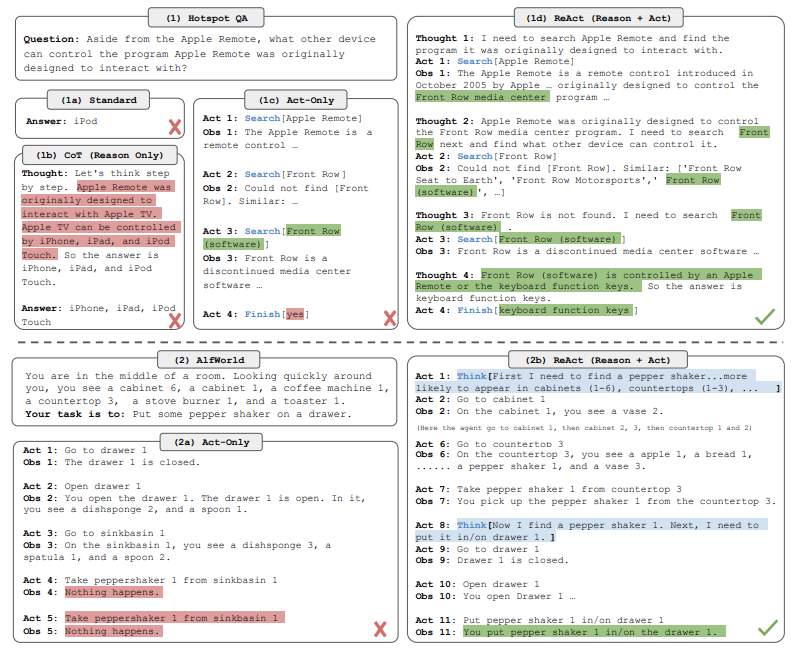

**反思模块**，通常被称为**Reflexion**，是一种通过语言反馈强化语言模型智能体的框架。它与 ReAct 方法相辅相成，旨在提升模型的推理和决策能力
https://www.promptingguide.ai/zh/techniques/reflexion?utm_source=chatgpt.com
- **Reflexion** 的核心思想是让模型在任务执行过程中进行自我反思和改进。具体而言，模型会在每次尝试后，评估自己的表现，识别可能的错误，并生成改进计划，以在后续尝试中避免类似问题。

**Reflexion** 框架通常包含以下三个模块：

1. **行动者（Actor）**：基于大型语言模型（LLM），负责根据任务需求生成所需的推理和行动步骤。

2. **评估者（Evaluator）**：对行动者的输出进行评价，判断其是否成功完成任务，并提供反馈。

3. **自我反思（Self-Reflection）**：利用评估者的反馈，分析失败的原因，并制定新的计划，以改进模型的表现。

通过引入自我反思模块，模型能够在任务执行过程中进行自我评估和改进，从而提高复杂任务的解决能力。

需要注意的是，**Reflexion** 并非 ReAct 方法的内置模块，而是可以与 ReAct 结合使用的增强策略。通过在 ReAct 框架中引入自我反思机制，模型能够在推理和行动的过程中进行自我评估和改进，从而提升整体性能。 

![image.png](simplified-agent-flow.svg)

![image.png](agent-flow-chart.svg)

In [174]:
def reflection(user_query,memory_global):
    prompt='''
    你是一个专业的汽车销售助手的规划模块。你的任务是：
1. 分析用户的查询:{0}
2. 基于已有的信息，是否还需要延伸再进行查询

##目前已有的信息:
{1}


## 可用工具
1. **本地文档搜索**：搜索本地星辰电动ES9的文档，包含以下章节：
   - 产品概述
   - 设计理念
   - 技术规格
   - 驱动系统
   - 电池与充电
   - 智能座舱
   - 智能驾驶
   - 安全系统
   - 车身结构
   - 舒适性与便利性
   - 版本与配置
   - 价格与购买信息
   - 售后服务
   - 环保贡献
   - 用户评价
   - 竞品对比
   - 常见问题
   - 联系方式

2. **网络搜索**：在互联网上搜索相关信息

## 工具选择规则
- 当查询明确涉及星辰电动ES9的具体信息、参数、功能或服务时，优先使用**本地文档搜索**
- 当查询涉及以下情况时，使用**网络搜索**：
  - 与其他品牌车型的详细对比
  - 最新市场动态或新闻
  - 非官方的用户体验或评测
  - 星辰电动ES9文档中可能没有的信息
  - 需要实时数据（如当前市场价格波动等）

## prompt延伸的规则
- 本地检索的查询扩展侧重于产品信息的深度查询
- 网络检索的查询扩展侧重于本地无法检索到的信息

###重要！
至多再扩展不超过3个查询，如果需要扩展则按照下面的输出格式输出，如果不需要则返回None




## 输出格式
你的输出应该是一个JSON格式的列表，每个项目包含：
1. `action_name`：工具名称（"本地文档搜索"或"网络搜索"）
2. `prompts`：一个扩展的问题，如果是网络检索，prompt不包含电动ES9，如果是本地检索，prompt只包含询问电动ES9，检索内容一定是一个简单问题，不包含对比
[
  {{
    "action_name": "工具名称",
    "prompts":'查询内容'
  }}
  ...
]

    '''.format(user_query,memory_global)
    result=(middle_json_model(prompt))
    # print(result)
    json_list=extract_json_content(result)
    try:
        structure_output=json.loads(json_list)
    except:
        structure_output = None

    return structure_output
        
    

In [175]:
reflection(user_query,memory_global)

[{'action_name': '网络搜索', 'prompts': '华为汽车在智能驾驶和电池技术方面的最新进展和市场反馈'},
 {'action_name': '本地文档搜索', 'prompts': '星辰电动ES9的用户评价中提到的主要优缺点'},
 {'action_name': '网络搜索', 'prompts': '华为汽车的用户评价中提到的主要优缺点'}]

In [177]:
#整个流程中3个agent相互协同，plan，action，answer

def agent_reflection(user_query):
    memory_global=[]
    print("开始任务规划...")
    action_tool=agent_plan(user_query)
    if action_tool:
        adjusted_tools = adjust_format(action_tool)
        actions=adjusted_tools
    else:
        actions=[]
    if actions:
        print("开始任务执行...")
        memory_new=process_actions(actions)#这个要替换为执行的rag和websearch的函数名称
        memory_global.extend(memory_new[1:])
    action_reflect=reflection(user_query,memory_global)
    if action_reflect:
        print("回顾内容，进行反思...")
        memory_new=process_actions(actions)
        memory_global.extend(memory_new)
    final_answer(memory_global,user_query)

In [178]:
agent_reflection(user_query)

开始任务规划...
[
  {
    "action_name": "本地文档搜索",
    "prompts": [
      "星辰电动ES9的主要优势和特点是什么？",
      "星辰电动ES9的技术规格和配置有哪些？"
    ]
  },
  {
    "action_name": "网络搜索",
    "prompts": [
      "华为汽车主要优势和特点是什么？",
      "华为汽车的技术规格和配置有哪些？",
      "华为汽车与星辰电动ES9的市场表现对比如何？"
    ]
  }
]
开始任务执行...
正在执行本地文档搜索: "星辰电动ES9的主要优势和特点是什么？"
提问：星辰电动ES9的主要优势和特点是什么？
结果：('[1] # 产品概述\n\n星⾠电动ES9是星⾠汽⻋公司推出的旗舰级纯电动智能SUV，代表了当前电动汽⻋领域的最⾼技术⽔平。ES9采⽤全新第四代电动平台架构，集成了前沿电池技术、智能驾驶辅助系统和创新交互体验，为⽤⼾提供安全、⾼效、舒适的出⾏解决⽅案。\n\nES9以"科技融⼊⽣活，电动改变未来"为产品理念，通过⽆缝连接⻋辆、⽤⼾和环境，创造全⽅位的智能移动体验。⽆论是⽇常通勤、⻓途旅⾏还是家庭出游，ES9都能满⾜现代⽤⼾多样化的⽤⻋需求。\n\n[2] 作为星⾠汽⻋的旗舰产品，ES9凝聚了公司⼗年电动汽⻋研发经验，是智能电动出⾏的典范之作。# 设计理念\n\n# 外观设计：未来主义与空⽓动⼒学的完美融合\n\nES9的外观设计由国际知名设计师团队主导，采⽤"流体动⼒学"设计语⾔，将未来感与实⽤性完美结合。⻋⾝线条流畅优雅，同时实现了0.21的超低⻛阻系数，处于全球SUV领先⽔平。\n\n[3] # 优势分析\n\n星⾠ES9相⽐竞品具有以下显著优势：\n\n1. 电池技术：半固态电池技术领先⾏业，能量密度更⾼，充电速度更快\n2. 智能驾驶：⾃研Nebula芯⽚算⼒⾏业领先，⽀持更⾼级别⾃动驾驶功能\n3. 数字座舱：55英⼨超宽曲⾯屏幕创新设计，交互体验领先同级产品\n4. 充电⽣态：全国超过5000个超充站点，充电⽅便程度显著⾼于竞品\n5. 材料⼯艺：⼤量采⽤⾼强度铝合⾦与碳纤维复合材料，轻量化效果突出\n\n[4] 星际电动在全国已建设超过5000个超级充电站，覆盖主要城市和高速公

No sentence-transformers model found with name sentence-transformers/all-MiniLM-L6-v2. Creating a new one with mean pooling.


Thread 0 completed! Time consumed: 2.00s
提问：华为汽车的技术规格和配置有哪些？
结果：根据现有的搜索结果及我关于华为汽车技术的知识，以下是华为汽车的一些技术规格和配置：

1. **汽车的智能化和电动化**：华为汽车的核心在于其智能化和电动化平台，例如通过途灵平台提供的部分智能服务[1]。

2. **电子和电气架构**：华为与众多国内车企在电子电气架构方面可能存在竞争，这其中包括了上汽、一汽、东风等车企成立的研发体系[2]。华为提供完整的电子架构产品，目标是通过先进技术，帮助汽车产业实现更加智能化的演变。

3. **Tier 1的角色**：传统汽车供应商（Tier 1），在与华为的合作或竞争中，面临着转型的挑战，转而成为华为提供的硬件供应商。这显然是汽车行业的新一轮洗牌中重要的变化部分，华为力图从中受益[3]。

4. **隐私和用户体验**：华为强调其设备的隐私保护政策和数据处理透明度，这也是其车载系统的一个功能特点[4]。

5. **电池和续航能力**：在电池技术方面，华为提供的电池电量按1/3C放电计算，如果遇上天气、路况等不同因素，性能表现数据可能会有所不同[5]。

虽然具体型号华为汽车的技术规格和配置详情未详细给出，但以上信息反映出华为在车联网、智能化管理和电动化方面的战略部署。

参考文献：
[1] 网址：https://www.163.com/dy/article/JBVL5TJ8051286OQ.html
    引用句子：“走向智能化、电动化的一个核心部件。”途灵平台其实分为几个部分。

[2] 网址：https://www.xchuxing.com/article/26644
    引用句子：而国内车企中，上汽成立了零束，一汽、东风、长安南京成立了中汽创智，吉利、长城也有自己的电子电气架构研发体系。

[3] 网址：https://www.xchuxing.com/article/26644
    引用句子：在过去，Tier 1 为车企提供整个解决方案。未来，解决方案的主控权会转移到车企手中。原来比较强势的 Tier 1 都可能沦为车企的硬件供应商。

[4] 网址：https://zh.wikipedia.org/zh-cn/%E5%B0%8F%E7%B1%B3SU7
    引用句子：隐私

# deepseek-r1对比，比较较为宽泛，无针对性，不够打动

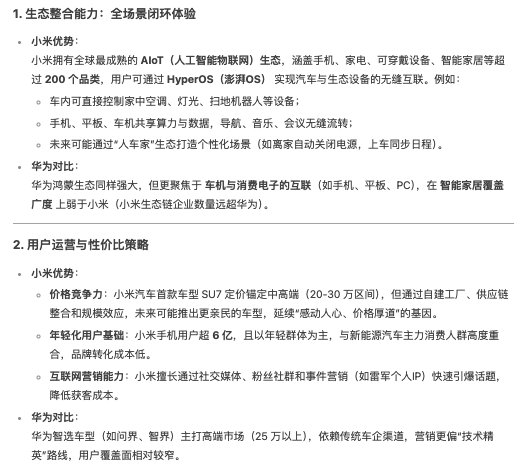

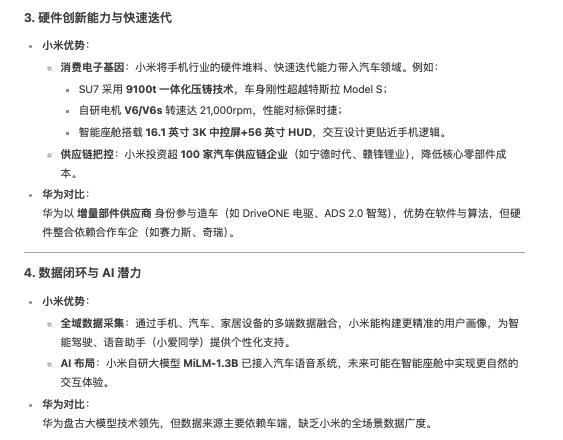

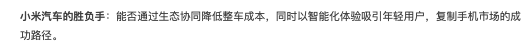